### 自己实现了一个感知算法
如果数据是线性可分的，那么就可以收敛，否则不行

核心就是求w

* w:=w+delta_w
* delta_w = eta*(y-output)x

the perceptron rule and Adaline

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


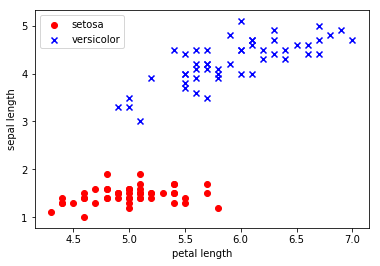

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
y = df.iloc[0:100,4].values
y = np.where(y=='Iris-setosa', -1,1)
X = df.iloc[0:100,[0,2]].values
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')           

In [4]:
import numpy as np
class Perceptron(object):
    """
    eta: float learning rate 0.0~1.0
    n_iter: int
    
    w_: 1d-array weights
    errors_: list misclassifications
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """
        X : array-like, shape=(n_samples, n_features)
        y : array-like, shape=(n_samples), target
        """
        self.w_ = np.zeros(1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update!=0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >=0.0, 1, -1)
    
    

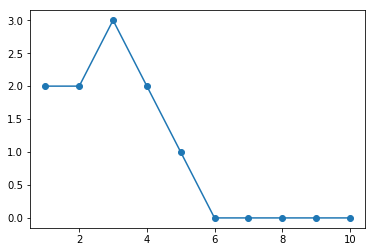

In [5]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')

上图我们看出，迭代到6的时候，误差是0，也就是结果收敛了

In [11]:
X.shape,len(np.zeros(1+X.shape[1]))

((100, 2), 3)

In [12]:
zip(X,y)

In [13]:
np.zeros(1+X.shape[1])[1:]

array([ 0.,  0.])

In [ ]:
# adaptive linear neurons ...